<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Multi_Scale_Context_Aggregation_by_Dilated_Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multi-Scale Context Aggregation by Dilated Convolutions**

논문 링크: https://arxiv.org/abs/1511.07122

기존 convolution network는 image classification에서 매우 좋은 성능을 보여준다. 그러나 semantic segmentation 분야는 각 pixel을 분류하는 조밀한 예측(dense prediction)의 경우는 image classification과 구조적으로 다르다.

따라서 본 논문에서는 해상도의 손실없이 receptive field를 확장할 수 있는 새로운 convolution network module인 **Dilated Convolution**을 제안한다.

## **Dilated Convolution**

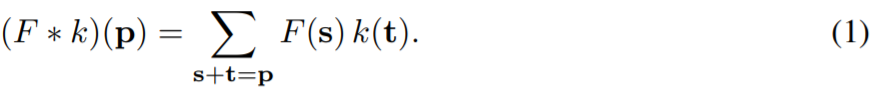

위의 식은 일반적인 convolution 식이다.

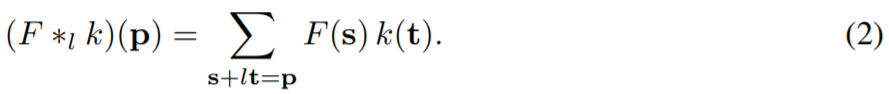

그리고 위의 식이 바로 dilated convolution 식이다. 이때 l이 대체 무엇일까? 아래를 보면 쉽게 이해할 수 있다.

In [1]:
from IPython.display import Image
Image(url='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbubYS6%2FbtqCy5w5kje%2FyVzKfV2uQ6l1Bf9UzYfSYK%2Fimg.gif')

위의 GIF는 standard convolution 즉, l 값이 1일때이다.

In [2]:
from IPython.display import Image
Image(url='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcQmWLK%2FbtqCy3F1y4Q%2FaktvSZPpRKIQ89edUhjPq1%2Fimg.gif')

반면 위의 GIF는 l 값이 2인 dilated convolution이다. receptive field가 standard convolution에 비해 더 크다는 것을 알 수 있다.

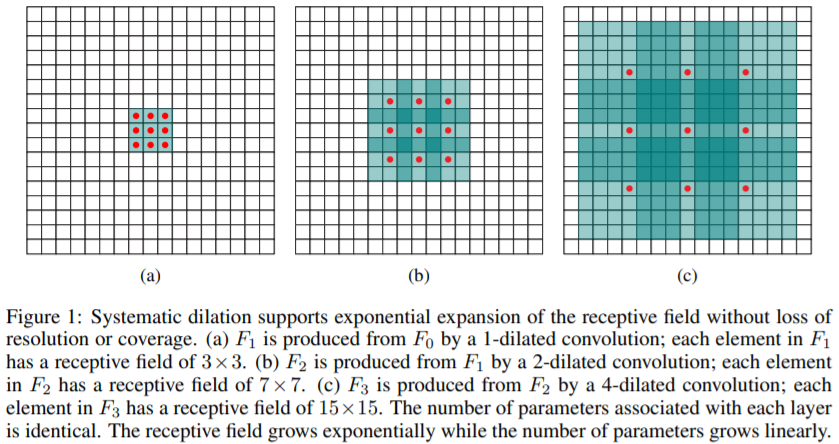

이렇게 dilated convolution을 사용하게 되면 큰 recpetive를 적은 parameter로 얻을 수 있다는 점이다. 즉, 위의 그림 Figure 1과 같이 연산량 관점에서 매우 탁월한 효과를 얻을 수 있다.

## **Front End**

자 이제 위에서 살펴본 dilated convolution이 어떻게 사용되는지 살펴보겠다. 본 논문에서는 context module 다음에 front end가 나오지만 그 반대로 더 자연스럽기 때문에 front end를 먼저 설명하겠다.

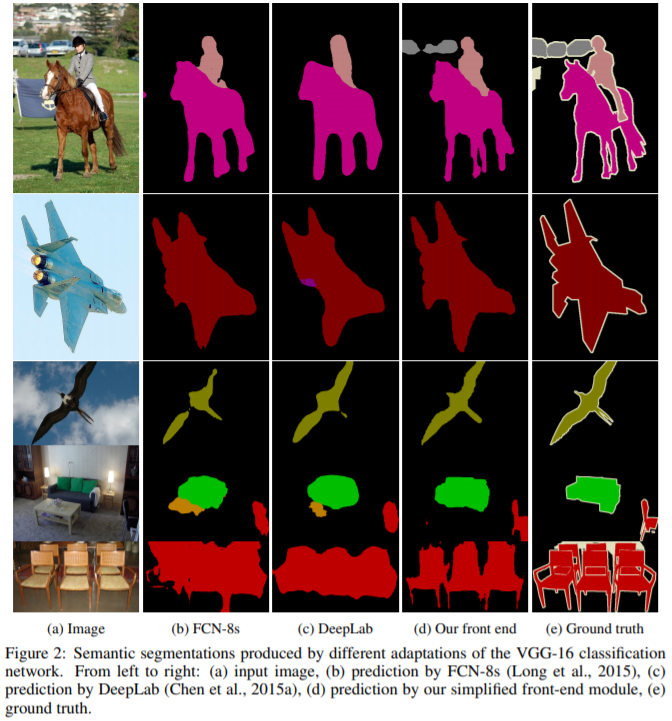

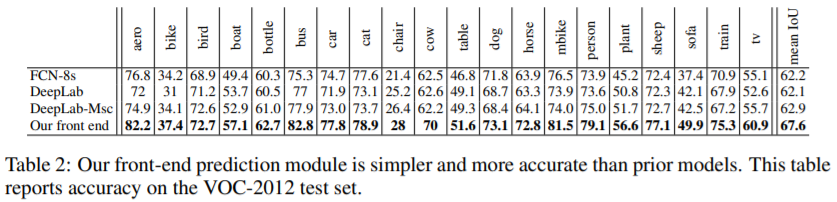

FCN 논문을 보면 VGG-16을 뒷단을 제외하고 나머지를 그대로 사용하였다. FCN에서는 pool4와 pool5를 그대로 사용했기에 feature-map의 크기가 1/32까지 줄어들고, 이러한 문제를 해결하기 위해 skip layer를 추가했다.

하지만 본 논문에서는 pool4와 pool5를 제거함으로써 최종적인 feature-map의 크기가 input의 1/8정도까지만 줄어들었기 때문에 upsampling을 통해 원영상 크기로 만들어도 detail이 상당히 살아있다. 뿐만아니라 skip layer가 없어지는 등 더욱 간단해졌기 때문에 연산 측면에서도 이익을 봤다.

위의 그림 Figure 2와 표 Table 2를 보면 확실히 성능이 좋아졌다는 것을 알 수 있다.

## **Context Module**

context module의 목적은 다양한 크기의 contextual 정보를 모아서 dense prediction architecture의 성능을 향상키기 위한 것이다.

Context module은 basic type과 large type이 있는데, basic module은 C개의 feature map을 input으로 받아 output으로 C개의 feature map 생성하기 때문에 (즉, input, output이 same하기 때문에) 어느 dense prediction architecture에 사용해도 괜찮다. large type의 경우는 feature map 개수를 늘렸다가 최종단만 원래의 input feature map과 같게 한다.

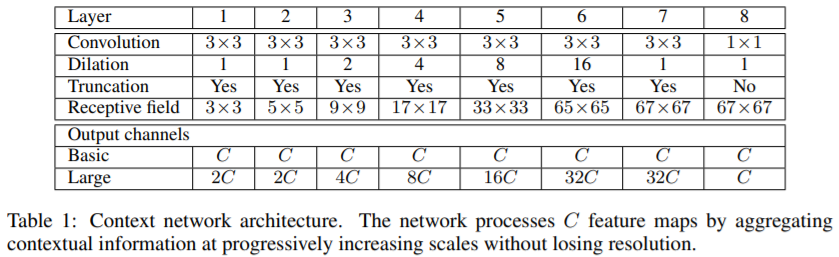

위의 표 Table 1을 보면 context module으 구성을 알 수 있으며, 본 논문에서는 front end module뒤에 context module을 배치했다.

## **Experiments**

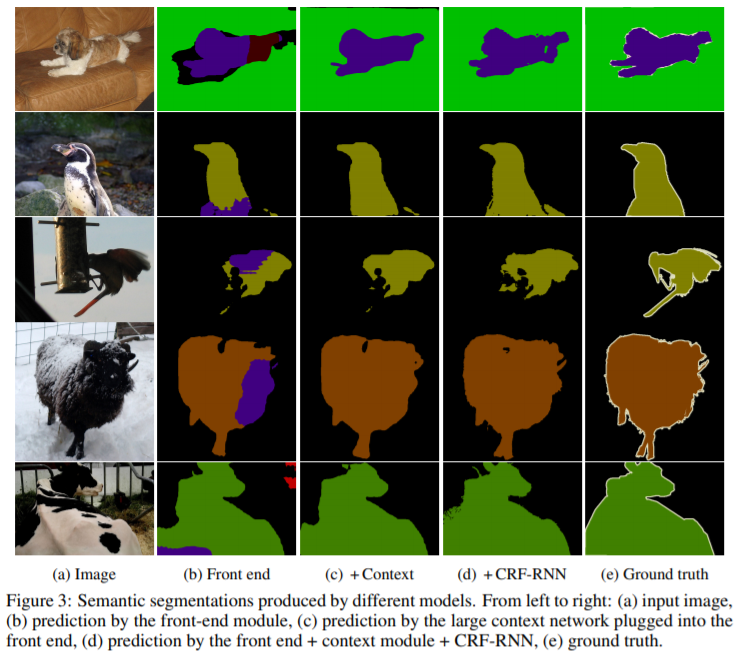

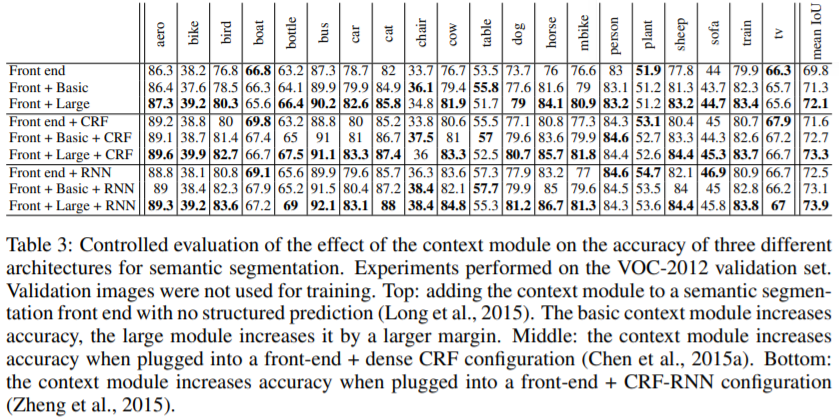

위의 그림 Figure 3과 표 Table 3을 보면 front end module만 추가해도 기존 model에 비해 성능이 개선되며 context module까지 추가시 더욱 성능이 좋아지는 것을 알 수 있다.